### Main Objective
<hr>

This project will be focused on __prediction.__ The main objectives of this project are as follows:

- To apply data preprocessing and preparation techniques in order to obtain clean data.
- To build at least three supervised machine learning classification models that are able to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed based on smartphone data.
- To analyze and compare performance of each model in order to choose the best model.

### Brief Description of the Data
<hr>

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

### Brief Summary of Data Exploration
<hr>

In [1]:
import os, seaborn as sns, pandas as pd, numpy as np
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
import warnings
warnings.simplefilter(action='ignore')

In [26]:
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')
filesize = os.path.getsize(filepath) / (1024*1024)
print('Dataset Size: ' + f'{filesize:.2f}' + ' MB')

Dataset Size: 67.36 MB


In [3]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [4]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

The data columns are all floats except for the activity label. There are many columns lets use `value_counts`.

In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [6]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [7]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [8]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Lets examine the breakdown of activities--they are relatively balanced.

In [9]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Lets use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

8438    1
6951    5
2961    0
8445    1
183     2
Name: Activity, dtype: int32

Calculating the correlations between the dependent variables.

In [11]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

Creating a histogram of the absolute value correlations.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

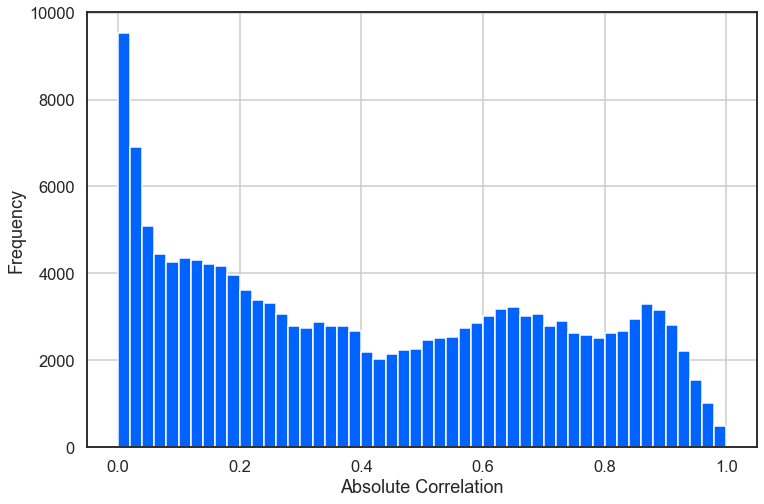

In [13]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

The most highly correlated values

In [14]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


Lets split the data into train and test data sets. We will be using Scikit-learn's StratifiedShuffleSplit to maintain the same ratio of predictor classes.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

Lets compare the ratio of classes in both the train and test splits.

In [16]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

### Training and Testing Models
<hr>

Labels that are useful in plotting confusion matrix.

In [18]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

Function to plot the confusion matrix.

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
#plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Generic function to run any model specified.

In [20]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('Accuracy: {}'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('Confusion Matrix:')
        print('{}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=False, title='Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('Classifiction Report:')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

Method to print the gridsearch Attributes.

In [21]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('Best Estimator: {}'.format(model.best_estimator_))
    # parameters that gave best results while performing grid search
    print('Best parameters: Parameters of best estimator : {}'.format(model.best_params_))
    #  number of cross validation splits
    print('No of CrossValidation Sets: Total number of cross validation sets: {}'.format(model.n_splits_))
    # Average cross validated score of the best estimator, from the Grid Search 
    print('Average cross validated score of the best estimators: {}'.format(model.best_score_))

#### 1. Logistic Regression

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done
training_time(HH:MM:SS.ms) - 0:00:17.454907
Predicting test data
Done
testing time(HH:MM:SS:ms) - 0:00:00.015614
Accuracy: 0.982200647249191
Confusion Matrix:
[[582   0   0   0   1   0]
 [  0 510  22   0   0   1]
 [  0  24 548   0   0   0]
 [  0   0   0 514   2   1]
 [  0   0   0   1 419   2]
 [  0   0   0   1   0 462]]


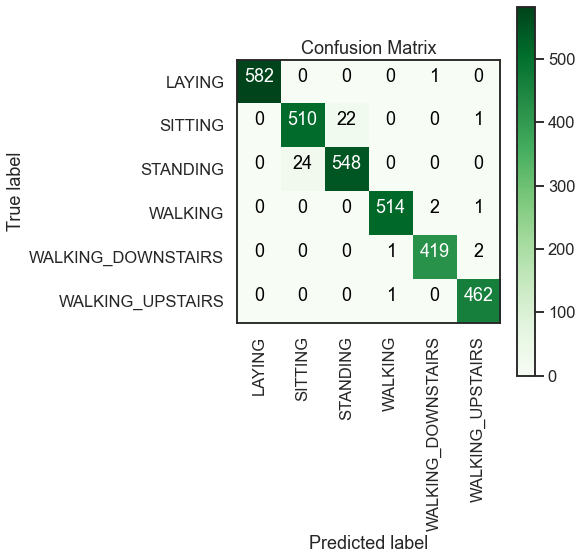

Classifiction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.96      0.96      0.96       533
           2       0.96      0.96      0.96       572
           3       1.00      0.99      1.00       517
           4       0.99      0.99      0.99       422
           5       0.99      1.00      0.99       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090

Best Estimator: LogisticRegression(C=20)
Best parameters: Parameters of best estimator : {'C': 20, 'penalty': 'l2'}
No of CrossValidation Sets: Total number of cross validation sets: 3
Average cross validated score of the best estimators: 0.9776668053821612


In [22]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30],
              'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(log_reg_grid_results['model'])

#### 2. Support Vector Machine

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done
training_time(HH:MM:SS.ms) - 0:01:09.952484
Predicting test data
Done
testing time(HH:MM:SS:ms) - 0:00:00.031215
Accuracy: 0.9825242718446602
Confusion Matrix:
[[582   1   0   0   0   0]
 [  0 519  14   0   0   0]
 [  0  37 535   0   0   0]
 [  0   0   0 517   0   0]
 [  0   0   0   0 422   0]
 [  0   0   0   2   0 461]]


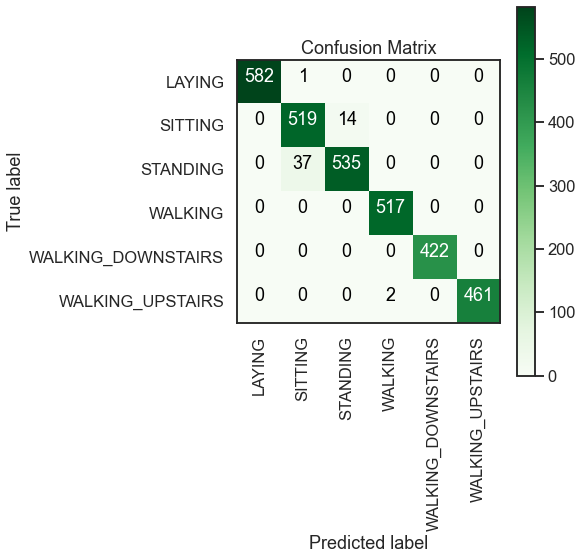

Classifiction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.93      0.97      0.95       533
           2       0.97      0.94      0.95       572
           3       1.00      1.00      1.00       517
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090

Best Estimator: LinearSVC(C=1, tol=5e-05)
Best parameters: Parameters of best estimator : {'C': 1}
No of CrossValidation Sets: Total number of cross validation sets: 5
Average cross validated score of the best estimators: 0.9836313393861753


In [27]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(lr_svc_grid_results['model'])

#### 3. Decision Trees

training the model..
Done
training_time(HH:MM:SS.ms) - 0:00:11.994951
Predicting test data
Done
testing time(HH:MM:SS:ms) - 0:00:00
Accuracy: 0.9268608414239482
Confusion Matrix:
[[583   0   0   0   0   0]
 [  0 485  48   0   0   0]
 [  0  59 513   0   0   0]
 [  0   0   0 479  18  20]
 [  0   0   0   9 400  13]
 [  0   0   0  22  37 404]]


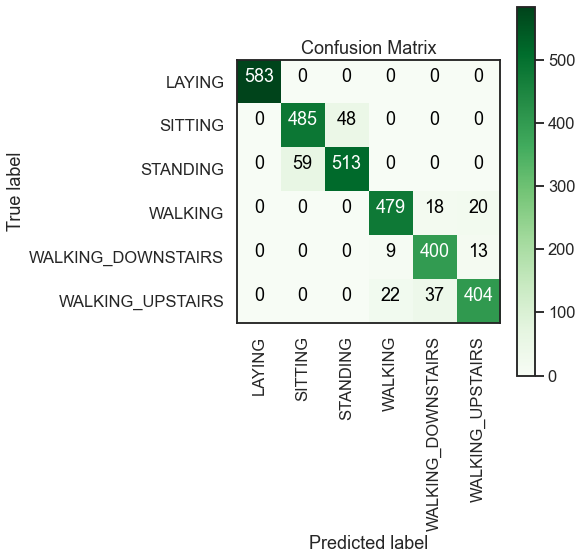

Classifiction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.89      0.91      0.90       533
           2       0.91      0.90      0.91       572
           3       0.94      0.93      0.93       517
           4       0.88      0.95      0.91       422
           5       0.92      0.87      0.90       463

    accuracy                           0.93      3090
   macro avg       0.92      0.93      0.92      3090
weighted avg       0.93      0.93      0.93      3090

Best Estimator: DecisionTreeClassifier(max_depth=9)
Best parameters: Parameters of best estimator : {'max_depth': 9}
No of CrossValidation Sets: Total number of cross validation sets: 5
Average cross validated score of the best estimators: 0.9274515597794336


In [24]:
from sklearn.tree import DecisionTreeClassifier
#parameters = {'max_depth':np.arange(3,10,2)}
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

### Comparing All Models
<hr>

In [29]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%       {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))
print('\n')


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 98.22%       1.78%
Linear SVC          : 98.25%       1.748% 
DecisionTree        : 92.69%       7.314% 




### Choosing the Best Classifier Model
<hr>

We should choose ___Support Vector Machine___ (___Linear SVC___) algorithm for our model.

### Summary of Key Findings and Insights
<hr>

Decision Tree is definitely not working out for this dataset. We see a near tie between Logistic Regression and SVM with SVM performing a little better, but even in our SVM model, we're seeing confusion between the features `sitting` and `standing`.

### Suggestions for next steps
<hr>

If we're bound to use supervised ML only, I'd say we need more data to fix the sitting/standing confusion. I'd like to come back to this project and apply Deep Learning algorithms to to see how better this model can get at this limited data.